# Association between variables

We have seen how to describe and visualize "univariate" samples, i.e., samples composed of a single variable. More precisely, even when several variables were available, we analyzed the variables one by one. In practice, it often happens that the observations under analysis are composed of multiple variables. In these cases, it is useful to consider methods to describe and visualize the data in a "multivariate" manner, in order to study the interactions between the various factors that describe the phenomenon under analysis.

> In simple terms, we will say that two variables are associated if observing the value of one of the two variables tell us something about the value of the other variable.

As we will see, this is closely **related to the concept of dependence in probability**. In fact, **if two variables are independent, they typically show no statistical association**—knowing the value of one provides no information about the other.

Examples of associated variables are:
- Weight and height of a person: tall people tend to weigh more than short people;
- Education level and income: individuals with higher education often earn more;
- Age and blood pressure: older individuals tend to have higher blood pressure;
- Hours studied and exam score: more study time is often linked to better performance;

**Note that correlation does not imply causation**: two variables may be statistically associated without one directly causing the other. Confounding factors or reverse causality may be at play.

We will use again the Titanic dataset for our examples. Let's load it:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Given the dataset above, we might ask ourselves if some variables influence the values of others. For example:
- does being in first, second, or third class (variable `Pclass`) somehow influence the probability of survival (variable `Survived`)?
- does age (variable `Age`) or the price paid (`Fare`) somehow influence the probability of being saved (`Survived`)?

In this lesson, we will see different ways to summarize the distributions of two variables and verify any associations (or correlations) between the variables.

## Measures of Association between two Discrete Variables

Now let's look at measures that allow us to estimate if two variables are "associated" or not, meaning to what extent the values of one variable influence those of the other. We have seen that the variables `Sex` and `Pclass` seem to have some degree of association. Let's now look at a case of stronger association, by exploring the relationship between `Pclass` and `Survived`.

Let's consider three relative frequency distributions of `Survived` conditioning on the `Pclass` values:
* f(Survived|Pclass=1)
* f(Survived|Pclass=2)
* f(Survived|Pclass=3)

The table of conditional frequencies that follows summarizes these values

In [3]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Looking at the numbers, we see that the distributions are very different, depending on the conditioning applied. This is not surprising, because we imagine that passengers in first and second class had different treatment compared to those in third class.

Let's visualize the distributions graphically:

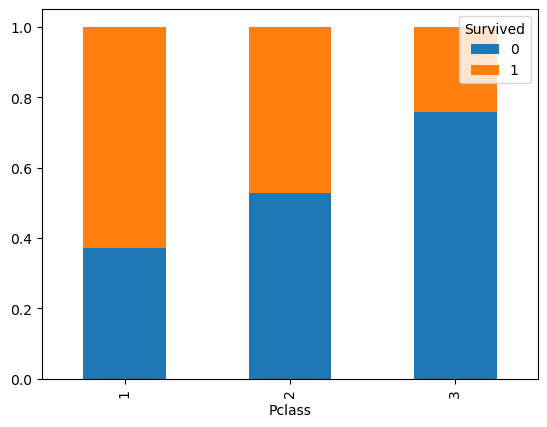

In [4]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0).plot.bar(stacked=True)
plt.show()

The graph clearly shows the imbalance, from which we deduce that `Pclass` and `Survived` are in fact **associated** (or **correlated**). Indeed, knowing the class, tell us something about the **likely values of survived**.

### Independence and Expected Frequencies
Before proceeding to illustrate some measures of association between variables, we must discuss the concept of **independence**, which is the opposite of association.

Two variables are said to be independent if the observation of one variable does not allow us to make any kind of prediction about the possible values of the other variable.

Imagine two randomly chosen people living in different, randomly chosen parts of the world. If we observe the way one of these two people dresses, this observation will tell us nothing about how the other might dress. The variables "clothes of the first person" and "clothes of the second person" are independent. The same does not apply if the people live in the same city. In that case, if it rains, for example, we expect the two people to wear similar clothes, so observing how one of the two people dresses can tell us something about how the other will dress.

Let's consider the generic contingency:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| X=$x_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

Now suppose we cannot observe the co-occurrences, but can only observe the marginal values:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     |   |   | ... |  | $n_{1+}$ |
| X=$x_2$     |   |   | ... |  | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     |   |  | ... |  | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

Now suppose we need to "reconstruct" the missing values. If the two variables are independent, then:

$$P(X=x_i, Y=y_j) = P(X=x_i) P(Y=y_j)$$

Recall that:

$$P(X=x_i) = \frac{n_{i+}}{n} \qquad P(Y=y_j) = \frac{n_{+j}}{n} \qquad P(X=x_i, Y=y_j)=\frac{n_{ij}}{n}$$

From here we obtain that the reconstructed frequencies $\tilde n_{ij}$ can be computed as follows:

$$\tilde n_{ij} = n \cdot P(X=x_i,Y=y_j) = n \cdot P(X=x_i) \cdot P(Y=y_j) = n \cdot \frac{n_{i+}}{n} \frac{n_{+j}}{n} = \frac{n_{i+}n_{+j}}{n}$$

From which:

$$\tilde n_{ij} = P(X=x_i) n_{+j} = P(Y=y_j) n_{+i}$$

Where the tilde on $\tilde n_{ij}$ indicates that this is an estimated value, not the actually observed value.

> What has been seen above suggests that the frequencies $n_{ij}$ follow the same distribution as the marginal frequencies in case of independence between the variables.

#### Example
Let's see an example on our contingency table putting `Pclass` and `Survived` in relation:

In [5]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


The marginal probability $P(Survived)$ is given by:

In [6]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

These are the probabilities $P(Survived=0)$ and $P(Survived=1)$.

If the two variables were not correlated, we would expect to have absolute frequencies proportional to the marginal probabilities:

$$\tilde{n}_{ij} = P(Y=y_j) \cdot n_{i+}$$

These values will be given by the following table:

In [7]:
f_ij = titanic['Survived'].value_counts(normalize=True).values
n_iplus = titanic['Pclass'].value_counts().sort_index().values.reshape(-1,1)

tab = f_ij*n_iplus
ct = pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).astype(float)
ct.values[:-1,:-1] = tab[...]
ct

Survived,0,1,All
Pclass,,,
1,133.090909,82.909091,216.0
2,113.373737,70.626263,184.0
3,302.535354,188.464646,491.0
All,549.000000,342.000000,891.0


Comparing these frequencies with the actual frequencies, we realize that there are discrepancies, reasonably due to the fact that the variables are not in fact independent.

### Pearson's $\mathcal{X}^2$ Statistic
Pearson's $\mathcal{X}^2$ statistic measures these discrepancies with the following formula:

$$\mathcal{X}^2 = \sum_{i=1}^k \sum_{j=1}^l \frac{(n_{ij}-\tilde{n}_{ij})^2}{\tilde{n}_{ij}}$$

The above formula calculates the squared differences between the observed and expected absolute frequencies (to eliminate negative signs) and scales the result by the expected frequencies. **Scaling the result ensures that small discrepancies obtained for small expected frequencies weigh more than small discrepancies obtained for large expected frequencies.**

Note that if the expected frequencies are identical to the observed ones, the statistic is zero.

We can calculate Pearson's $\mathcal{X}^2$ statistic as follows:

In [9]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(titanic['Pclass'], titanic['Survived'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

The function returns:
- The statistic value ($102.89$);
- The p-value of an associated statistical test (we will see this in a future lecture);
- The number of degrees of freedom, a technical details of the distribution underlying the statistical test;
- The "expected frequencies", i.e., the frequencies we would expect in case of independence.

Please note that when computing the chi-squared statistics, **certain conditions must be met to ensure validity**. Most importantly, expected frequencies in each cell of the contingency table should be sufficiently large—typically at least 5. This helps approximate the sampling distribution to a chi-squared distribution. Additionally, observations should be independent, and the data should be categorical, organized into a contingency table with mutually exclusive categories.

For the moment, we will stop here. We will get back to this statistic when we'll talk about statistical tests.

### Cramer's V Statistic
Pearson's $\mathcal{X}^2$ statistic is not normalized, in the sense that its maximum value depends on the sample size. To overcome this problem, Cramer's V statistic can be used, defined as follows:

$$V = \sqrt{\frac{\mathcal{X}^2}{n(min(k,l)-1)}}$$

The result will be a value between $0$ and $1$.

Cramer's V statistic can be computed as follows:

In [10]:
from scipy.stats.contingency import association

print(f"{association(pd.crosstab(titanic['Pclass'], titanic['Survived'])):0.2f}")

0.34


This value indicates a small association between the two variables, because the value is greater than $0$ but still not close to $1$.

## Associations Between Continuous Variables

When variables are continuous, it is no longer possible to construct contingency tables. In those cases, other tools are used, which we will see in this section.

We will consider the "diabetes" dataset for this part. The dataset was introduced in $1979$ by Reaven and Miller and examines the relationship between blood measurements and insulin in $145$ adults:

In [15]:
from statsmodels.datasets import get_rdataset
data = get_rdataset('Diabetes','heplots').data
data.head()

,relwt,glufast,glutest,instest,sspg,group
0,0.81,80,356,124,55,Normal
1,0.95,97,289,117,76,Normal
2,0.94,105,319,143,105,Normal
3,1.04,90,356,199,108,Normal
4,1.00,90,323,240,143,Normal


The $6$ variables have the following meanings:

*   ``relwt``
      relative weight, expressed as the ratio of actual weight to
      expected weight, given the person's height, a numeric vector

*   ``glufast``
      fasting plasma glucose level, a numeric vector

*   ``glutest``
      test plasma glucose level, a measure of glucose intolerance, a
      numeric vector

*   ``instest``
      plasma insulin during test, a measure of insulin response to oral
      glucose, a numeric vector

*   ``sspg``
      steady state plasma glucose, a measure of insulin resistance, a
      numeric vector

*   ``group``
      diagnostic group, a factor with levels ``Normal``
      ``Chemical_Diabetic`` ``Overt_Diabetic``

### Graphical Representation of Two Continuous Variables
Let's start by considering the variables `sspg` and `glutest`. 

#### Scatter plots
The first useful form of representation is the **scatter plot**, which visualizes observations as two-dimensional data:

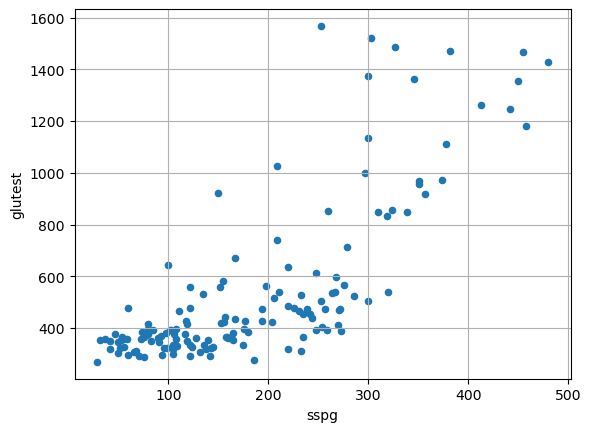

In [16]:
from matplotlib import pyplot as plt
data.plot.scatter(x='sspg',y='glutest')
plt.grid()

We note that there seems to be a relationship between the two variables. Indeed, as `sspg` increases, the values of `glutest` tend to increase. There appears to be a positive **correlation** (or **association**). Let's now consider the pair `relwt` and `sspg`:

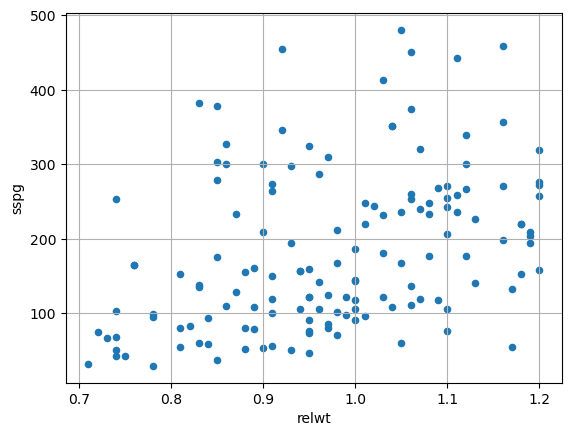

In [17]:
data.plot.scatter(x='relwt',y='sspg')
plt.grid()

#### Scatter Matrix
We note that in this case the relationship appears less marked, but we still note an ascending trend of `sspg` as `relwt` grows. It is often useful to try to study correlations with a **scattermatrix** that shows all possible scatterplots. In the case of our example:

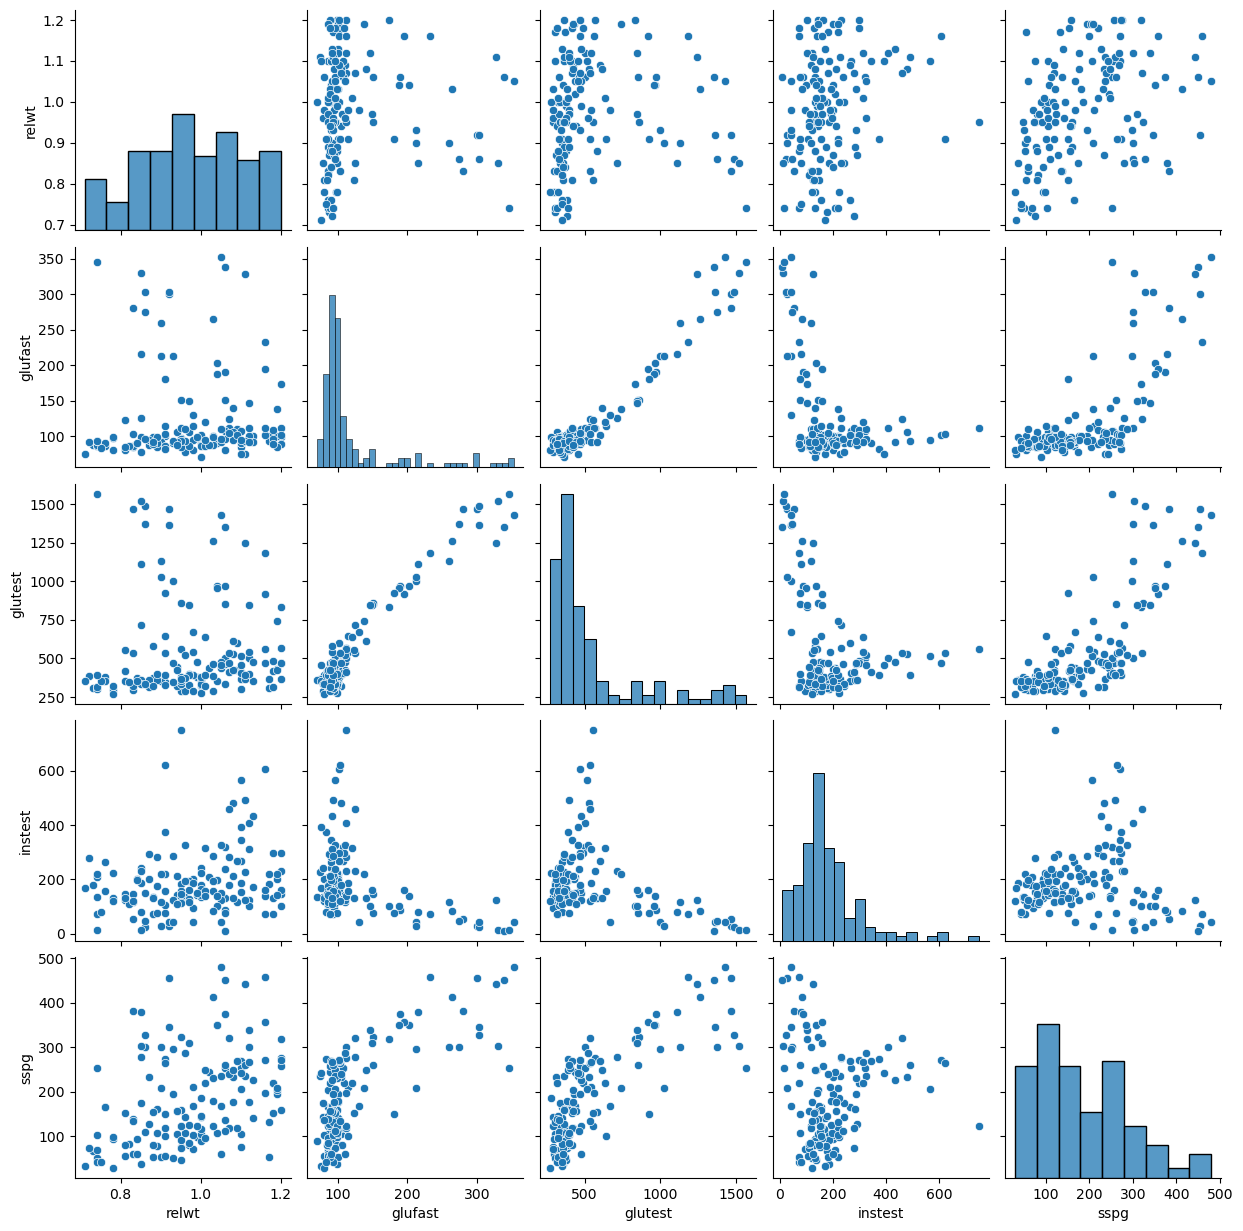

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

From the visualization above, we can deduce a few things:
* some pairs of variables are positively correlated (e.g., `relwt`-`sspg`), while others are negatively so (`glutest`-`instest`);
* some relationships are "linear" (e.g., `glutest` and `glufast`), while others tend not to be (e.g., `glufast` and `sspg`):
* some pairs of variables (e.g., `sspg` and `relwt`) do not appear to be correlated.

In our case, the data also contain a discrete variable `group` dividing the data into groups. We can reflect this in our visualization by specifying `hue='group'`:

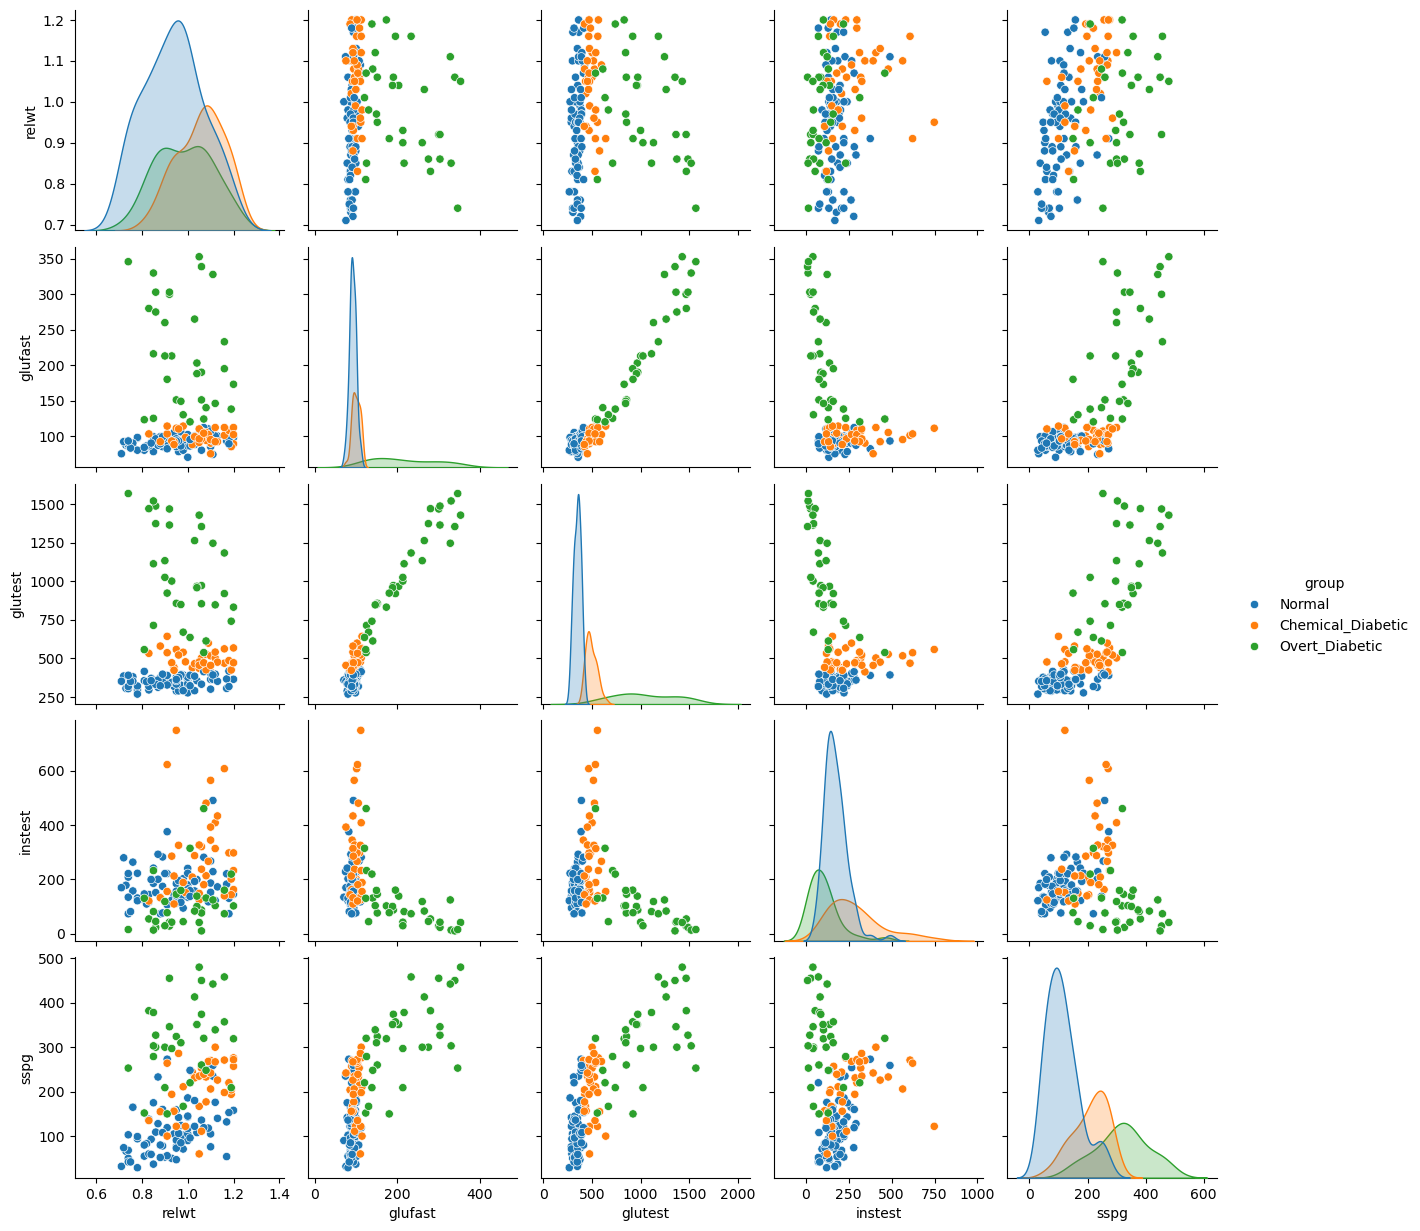

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data, hue='group')
plt.show()

#### Hexbin Plots: A 2D Histogram

When a scatterplot contains a large number of data points, we can encounter the problem of **overplotting**, where points are plotted on top of each other. This makes it difficult to discern the density of the data, as heavily populated areas can look the same as moderately populated ones.

> A **hexbin plot** is an excellent alternative that addresses this issue[cite: 48]. It divides the two-dimensional space into a grid of hexagonal bins and then colors each hexagon based on the number of data points it contains. Think of it as a two-dimensional histogram, which effectively visualizes data density.

Let's generate a hexbin plot for the `sspg` and `glutest` variables. We can adjust the `gridsize` parameter to control the number of bins (and thus their size).

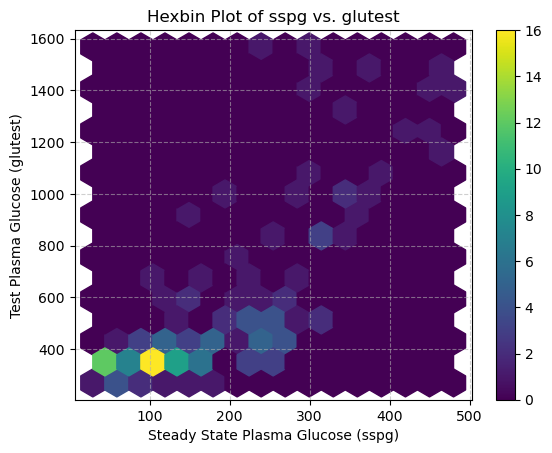

In [ ]:
from matplotlib import pyplot as plt
# let's use the hexbin function
# cmap is the color map
# gridsize regulates the number of hexagons
data.plot.hexbin(x='sspg', y='glutest', gridsize=15, cmap='viridis')
plt.xlabel('Steady State Plasma Glucose (sspg)')
plt.ylabel('Test Plasma Glucose (glutest)')
plt.title('Hexbin Plot of sspg vs. glutest')
plt.grid(linestyle='--', alpha=0.6)
plt.show()

This plot clearly shows that the highest concentration of data points (the darkest hexagons) is where both `sspg` and `glutest` values are low. This is a level of detail about the data's distribution that might be obscured in a dense, standard scatterplot.

#### Density and Contour Plots: A Smoother View of Distribution

Just as we used Kernel Density Estimation (KDE) to create a smooth curve representing the distribution of a single variable, we can apply the same principle to two variables. This gives us a smoother alternative to the binned approach of the hexbin plot.

The result is a **2D density plot**, which visualizes the estimated probability density of data points using a continuous color gradient. We can also overlay **contour lines**, which connect points of equal density, much like a topographical map shows lines of equal elevation. 🗺️

This method is excellent for identifying the shape and peaks of a bivariate distribution without being constrained by the grid of a histogram or hexbin plot. We'll revisit the theory behind **Kernel Density Estimation** in a later lecture, but for now, let's focus on its application.

Let's create a density plot for the `sspg` and `glutest` variables using the `seaborn` library.

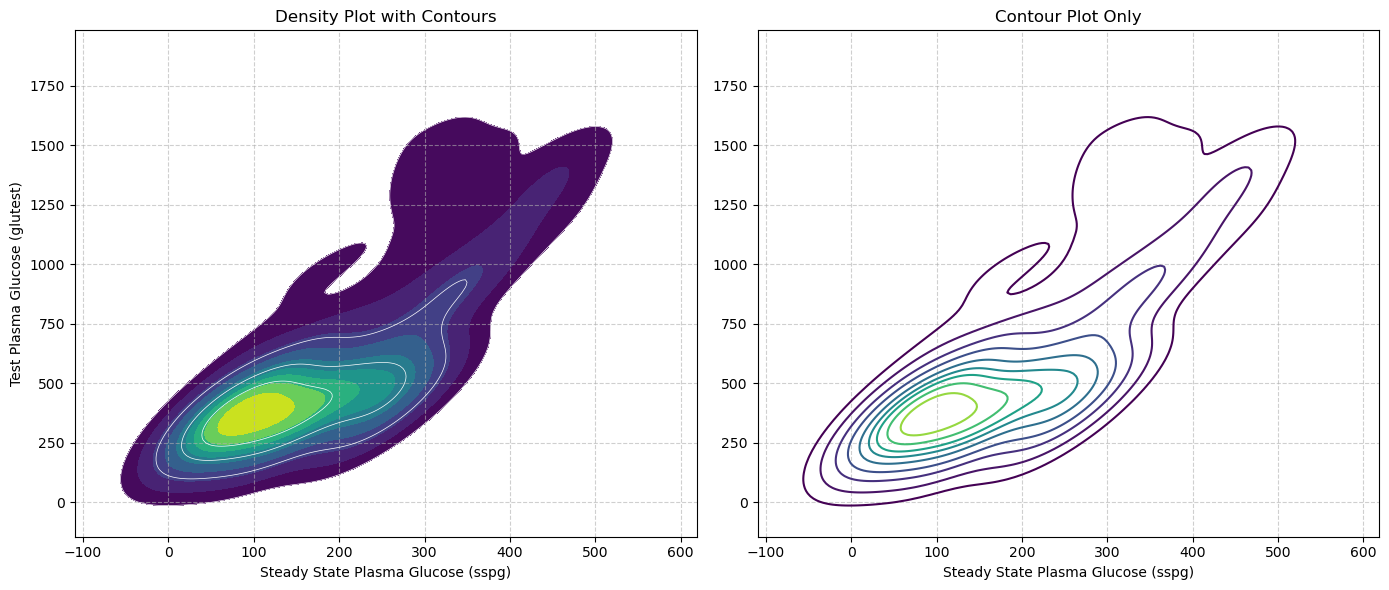

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Left Subplot (Density + Contour) ---
# we'll use kdeplot from seaborn
# we use it twice: first to fill the density, then to draw the contours
sns.kdeplot(data=data, x='sspg', y='glutest', fill=True, cmap='viridis', ax=axes[0])
# levels regulates the number of contour lines
# color and linewidths regulate the appearance of the contour lines
sns.kdeplot(data=data, x='sspg', y='glutest', levels=5, color='white', linewidths=0.5, ax=axes[0])
axes[0].set_title('Density Plot with Contours')
axes[0].set_xlabel('Steady State Plasma Glucose (sspg)')
axes[0].set_ylabel('Test Plasma Glucose (glutest)')
axes[0].grid(linestyle='--', alpha=0.6)

# --- Plot 2: Right Subplot (Contour Only) ---
# only the contours
sns.kdeplot(data=data, x='sspg', y='glutest', cmap='viridis', ax=axes[1])
axes[1].set_title('Contour Plot Only')
axes[1].set_xlabel('Steady State Plasma Glucose (sspg)')
axes[1].set_ylabel('') # Hide y-axis label for a cleaner look
axes[1].grid(linestyle='--', alpha=0.6)

# Adjust the layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

In the plot on the left, the color-filled areas provide an intuitive map of the data's density; the darkest regions represent the highest concentration of points, while the contour lines enclose areas of progressively lower density. This visualization clearly highlights a single, dense cluster in the lower-left corner.

The **contour-only plot** on the right is particularly useful when you need to **compare multiple distributions on the same axes**. While overlaying several filled density plots would result in colors obscuring each other, using only the contour lines for each group allows you to clearly see how the centers and shapes of different distributions overlap or diverge without the visual clutter.

### Covariance
We have seen that **variance** indicates how dispersed a univariate sample is around its mean. We can use a similar idea to quantify to what extent **two variables are distributed similarly around their mean**. We expect that, if the variables are correlated, then they will be distributed similarly.

The concept of **variance** is generalized by the concept of **covariance** in the case of bivariate data. Covariance measures how much the two variables vary together and is measured as follows:

$$
Cov(X,Y) = \frac{1}{n}\sum_i^n (x^{(i)} - \overline x) (y^{(i)} - \overline y)
$$

where $X$ and $Y$ are the two variables of interest, $x^{(i)}$ is the value of $X$ for the i-th observation, $y^{(i)}$ is the value of $Y$ for the i-th observation, and $\overline x$, $\overline y$ are the means of the observations for the two variables $X$ and $Y$.

Note that we can obtain an unbiased estimation of the covariance similar to the variance as follows:

$$
Cov(X,Y) = \frac{1}{n-1}\sum_i^n (x^{(i)} - \overline x) (y^{(i)} - \overline y)
$$

This is important especially with small samples.

The main "actors" in the formula above are the terms:

* $(x^{(i)}-\overline x)$: measures the distance between a point $x^{(i)}$ and its respective mean $\overline x$. If the value of the point in question is above the mean, then this difference will be positive, otherwise negative.
* $(y^{(i)}-\overline y)$: measures the distance between a point $y^{(i)}$ and its respective mean $\overline y$. If the value of the point in question is above the mean, then this difference will be positive, otherwise negative.

Each term of the sum in the covariance formula performs the products between these two terms:

$$(x^{(i)}-\overline x)(y^{(i)}-\overline y)$$

Which will be:
* **positive** if the elements $x^{(i)}$ and $y^{(i)}$ are "concordant", i.e., if they are both above their respective means or both below their respective means;
* **negative** if the elements $x^{(i)}$ and $y^{(i)}$ are "discordant", i.e., if one of the two is above its respective mean, while the other is below its respective mean;
* **zero or close to zero** if the elements $x^{(i)}$ and $y^{(i)}$ are very close to their respective means.

These quantities have a geometric interpretation. Let's consider the following plot:

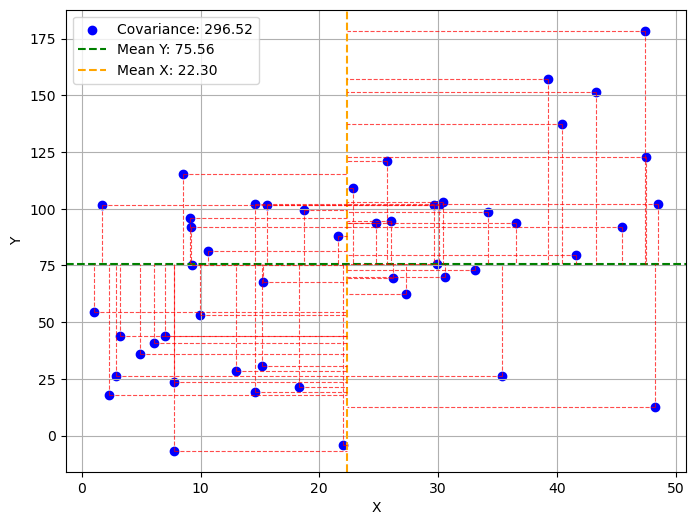

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Generate example data
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.randn(50)  # A linear relationship with some noise

x*=50
y*=40

# Calculate the Covariance
cov = np.cov(x,y)[0,1]

# Calculate the means of the two samples
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Covariance: {cov:.2f}', color='blue')

# Plot the means as horizontal and vertical lines
plt.axhline(mean_y, color='green', linestyle='--', label=f'Mean Y: {mean_y:.2f}')
plt.axvline(mean_x, color='orange', linestyle='--', label=f'Mean X: {mean_x:.2f}')

# Add line segments from data points to the respective mean lines
for i in range(len(x)):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r--', linewidth=0.8, alpha=0.7)
    plt.plot([x[i], x[i]], [y[i], mean_y], 'r--', linewidth=0.8, alpha=0.7)

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')

# Show legend
plt.legend()

# Display the plot
plt.grid()
plt.show()


The graph shows a sample of points and their respective means with a horizontal line (for Y) and a vertical line (for X). The two means divide the graph into four quadrants. For each point, the red dashed lines indicate the values of the magnitudes $(x^{(i)}-\overline x)$ and $(y^{(i)}-\overline y)$. Specifically:
* The points in the upper right quadrant will have both these magnitudes positive. The products $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ will be positive.
* The points in the lower right quadrant will have both these magnitudes negative. The products $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ will be positive.
* The points in the other two quadrants will have one of the magnitudes positive and the other negative. The products $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ will be negative.

In practice:
* points in the first and third quadrants contribute **positively** to the correlation coefficient;
* points in the second and fourth quadrants contribute **negatively** to the correlation coefficient.
* Points close to the mean (the intersection between the two means) will correspond to very small magnitudes and **will not contribute** to changing the covariance value.

Intuitively, the covariance will take on very positive values when $X$ and $Y$ vary in agreement (i.e., if $X$ takes high values, $Y$ takes high values, and if $X$ takes low values, $Y$ takes low values). Indeed, in such a case, the signs of the two factors within the summation will agree, and their product will have a positive sign. If, conversely, $X$ and $Y$ vary in disagreement, the product will have a negative sign, and the covariance will take on negative values.

We note that the covariance of a variable $X$ with itself is equal to the variance:

$$
Cov(X,X) = \frac{1}{n}\sum_i^n (x_i - \overline x) (x_i - \overline x) = s_X
$$

It should be noted that:
* Negative values indicate a negative correlation (when one of the two variables increases, the other decreases);
* Positive values indicate a positive correlation (the two variables increase or decrease together);
* Zero values (or close to zero) indicate that the two variables are not correlated (or are weakly correlated).

It should also be noted that covariance values are not normalized and depend on the ranges of the individual variables, therefore it is not possible to compare covariances. For example, the covariance between `relwt` and itself (thus the variance of `relwt`) is close to zero; however, this does not mean that `relwt` is not correlated with itself!

In practice, in the presence of multiple variables, the covariances of all possible pairs of variables are calculated, somewhat as seen in the case of the scatter matrix. We can obtain all these covariances with the cov function, as follows:

In [ ]:
data.drop('group',axis=1).cov() #drop the group column to compute covariance only on numerical columns

,relwt,glufast,glutest,instest,sspg
relwt,0.016702,-0.072815,0.982426,3.473373,5.266255
glufast,-0.072815,4087.097031,19546.064080,-3063.463649,4849.905651
glutest,0.982426,19546.064080,100457.849808,-12918.162739,25908.490182
instest,3.473373,-3063.463649,-12918.162739,14625.312548,101.482519
sspg,5.266255,4849.905651,25908.490182,101.482519,11242.331897


The matrix seen above is also called "covariance matrix" and denoted by the letter $\Sigma$. Given the variables $X=(X_i,\ldots,X_k)$, $\Sigma$ is a $[k \times k]$ matrix whose general term is:

$$\Sigma_{ij} = Cov(X_i,X_j)$$

### Pearson Correlation Coefficient

The Pearson correlation coefficient attempts to solve the problems of covariance by providing a normalized quantitative score. Given a bivariate sample $\{(x^{(i)},y^{(i)})\}$, the Pearson correlation coefficient is defined as the covariance between the two variables, divided by the product of their standard deviations:

$$
\rho(x,y)= \frac{Cov(X,Y)}{s_X s_Y}
$$

We note that:

$$
 \rho(x,y) = \frac{Cov(X,Y)}{s_X s_Y}  = \frac{1}{n} \sum \frac{(x_i - \overline x)}{s_X} \frac{(y_i - \overline y)}{s_X} = Cov(z(X),z(Y))
$$

Where

$$
z(X) = \frac{X-\overline X}{s_x}
$$

is the z-scoring function.

We can therefore view the Pearson correlation coefficient as the covariance of variables normalized with z-scoring. It can be easily seen that the Pearson correlation coefficient can also be written as follows:

$$
\rho(x,y) = \frac{\sum_{i=1}^n (x^{(i)}-\overline x)(y^{(i)}-\overline y)}{\sqrt{\sum_{i=1}^n (x^{(i)}-\overline x)^2} \sqrt{\sum_{i=1}^n (y^{(i)}-\overline y)^2}}
$$

Where $\overline x$ and $\overline y$ are respectively the means of the values of the two variables.

The following graph shows a plot analogous to the previous one after performing z-scoring. Note how the ranges of $x$ and $y$ are now normalized and the mean is at the origin.

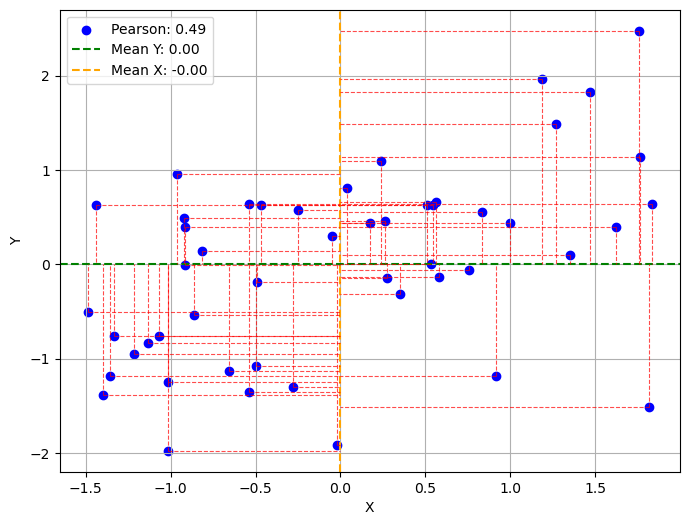

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, zscore

# Generate example data
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.randn(50)  # A linear relationship with some noise

x = zscore(x)
y = zscore(y)

# Calculate the Covariance
#cov = np.cov(x,y)[0,1]
cov = pearsonr(x,y)[0]

# Calculate the means of the two samples
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Pearson: {cov:.2f}', color='blue')

# Plot the means as horizontal and vertical lines
plt.axhline(mean_y, color='green', linestyle='--', label=f'Mean Y: {mean_y:.2f}')
plt.axvline(mean_x, color='orange', linestyle='--', label=f'Mean X: {mean_x:.2f}')

# Add line segments from data points to the respective mean lines
for i in range(len(x)):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r--', linewidth=0.8, alpha=0.7)
    plt.plot([x[i], x[i]], [y[i], mean_y], 'r--', linewidth=0.8, alpha=0.7)

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')

# Show legend
plt.legend()


x = zscore(x)
y = zscore(y)

# Display the plot
plt.grid()
plt.show()

Pearson's correlation coefficient is a number between $-1$ (maximum anticorrelation) and $1$ (maximum correlation).

In practice, you will have:
* $\rho(x,-x)=-1$
* $\rho(x,x) = 1$

The correlation coefficient between the variables `relwt` and `sspg` can be computed with the pearsonr function:

In [26]:
from scipy.stats import pearsonr
pearsonr(data['relwt'], data['sspg'])

PearsonRResult(statistic=np.float64(0.38431980355592876), pvalue=np.float64(1.820843846790297e-06))

This function returns both the statistic ($0.38$) and a p-value, associated to a statistical test, as we will see in a future lecture.

#### Interpretation of Pearson's Correlation Coefficient Values
Pearson's correlation coefficient is a number between $-1$ and $1$ which indicates whether there is a correlation (i.e., when the values of the first variable increase, the values of the second variable also increase) or an anticorrelation (i.e., when the values of the first variable increase, the values of the second variable decrease and vice versa). Values close to $-1$ indicate that the variables are anticorrelated; values close to $1$ indicate that the variables are correlated; values close to $0$ indicate that the variables are decorrelated. In practice:
 * The sign of the coefficient indicates the "direction" of the correlation:
   * Positive: the variables are correlated;
   * Negative: the variables are anticorrelated;
 * The absolute value of the coefficient indicates how strong the correlation (or anticorrelation) is:
   * for values between $0$ and $0.3$ it indicates a **weak** correlation (or anticorrelation);
   * for values between $0.3$ and $0.7$ it indicates a **moderate** correlation (or anticorrelation);
   * for values between $0.7$ and $1$ it indicates a **strong** correlation (or anticorrelation).

Note that Pearson's correlation coefficient only measures **linear correlations**. Therefore, a non-linear correlation might exist between two variables even if the obtained correlation coefficient is low.

The following graph shows the scatterplots of some example bivariate samples with different degrees of correlation, together with their respective Pearson correlation coefficients:

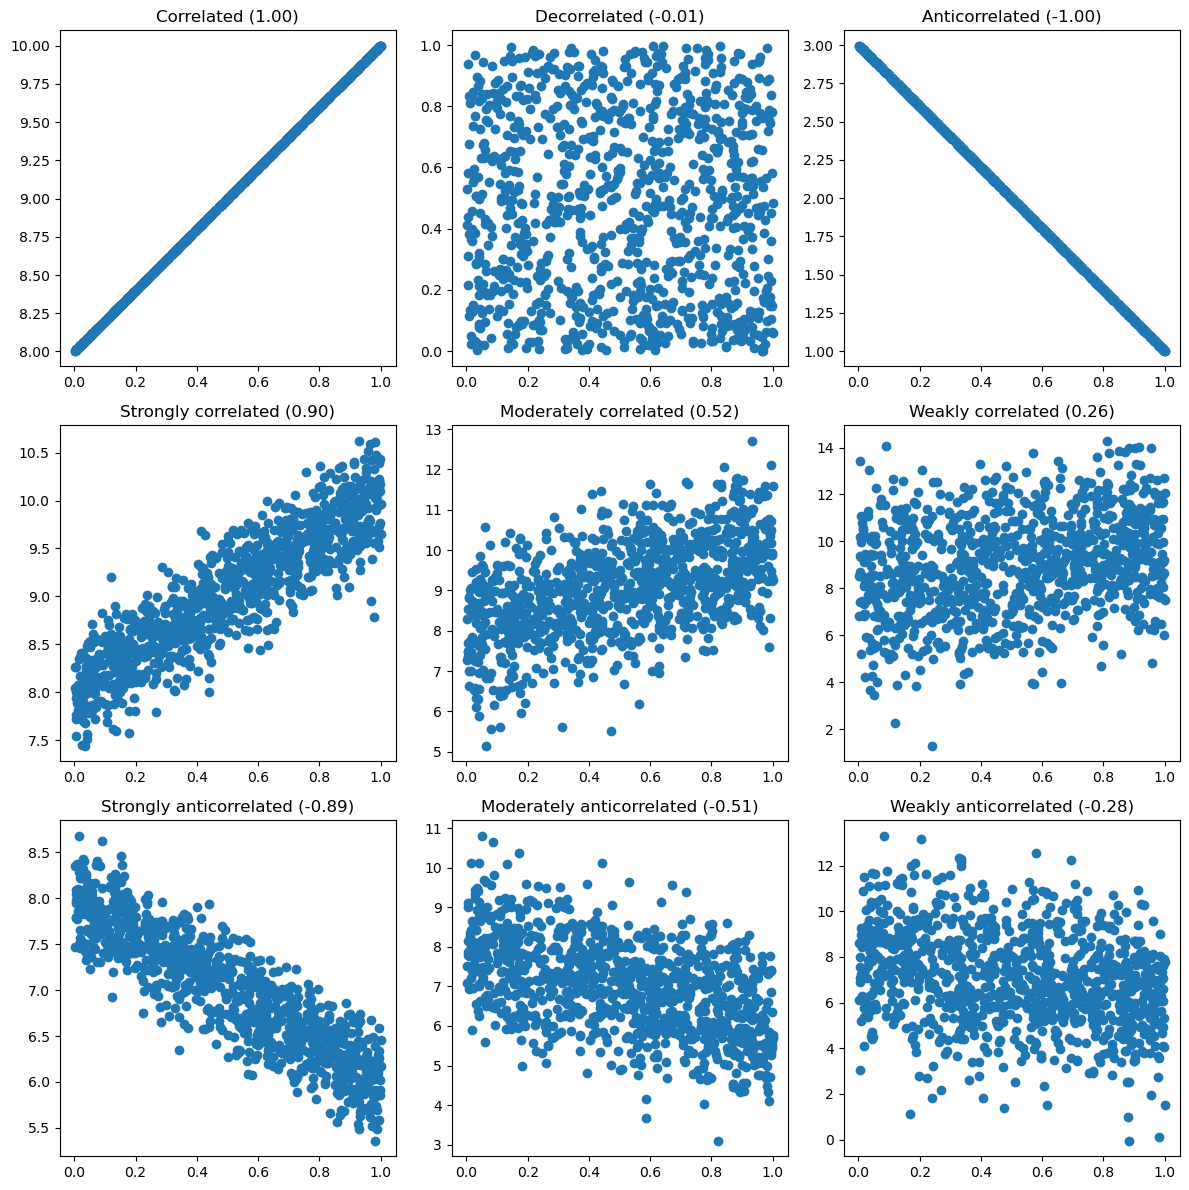

In [27]:
import numpy as np
import pandas as pd
np.random.seed(1234)

x = np.random.rand(1000)
y = np.random.rand(1000)

decorrelated_sample = pd.DataFrame({'x':x,'y':y})

correlated_sample = pd.DataFrame({'x':x,'y':2*x+8})
anticorrelated_sample = pd.DataFrame({'x':x,'y':-2*x+3})

strongly_correlated_sample =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,0.3,1000)})
strongly_anticorrelated_sample =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,0.3,1000)})

moderately_correlated_sample =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,1,1000)})
moderately_anticorrelated_sample =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,1,1000)})

weakly_correlated_sample =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,2,1000)})
weakly_anticorrelated_sample =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,2,1000)})

plt.figure(figsize=(12,12))
plt.subplot(331)
s=correlated_sample
plt.scatter(s['x'],s['y'])
plt.title("Correlated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(332)
s=decorrelated_sample
plt.scatter(s['x'],s['y'])
plt.title("Decorrelated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(333)
s=anticorrelated_sample
plt.scatter(s['x'],s['y'])
plt.title("Anticorrelated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(334)
s=strongly_correlated_sample
plt.scatter(s['x'],s['y'])
plt.title("Strongly correlated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(335)
s=moderately_correlated_sample
plt.scatter(s['x'],s['y'])
plt.title("Moderately correlated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(336)
s=weakly_correlated_sample
plt.scatter(s['x'],s['y'])
plt.title("Weakly correlated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(337)
s=strongly_anticorrelated_sample
plt.scatter(s['x'],s['y'])
plt.title("Strongly anticorrelated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(338)
s=moderately_anticorrelated_sample
plt.scatter(s['x'],s['y'])
plt.title("Moderately anticorrelated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(339)
s=weakly_anticorrelated_sample
plt.scatter(s['x'],s['y'])
plt.title("Weakly anticorrelated (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.tight_layout()

plt.show()

Observing the graphs shown above, we can note that the following relationships exist between index and scatterplot:
 * A positive index identifies an upward trend (a line with a positive slope);
 * A negative index identifies a downward trend (a line with a negative slope);
 * The absolute value of the index is correlated with the "width" of the "corridor" formed by the data.
 
Note that there is no relationship between Pearson's correlation coefficient and the slope of the line. We can see this in the following graph:

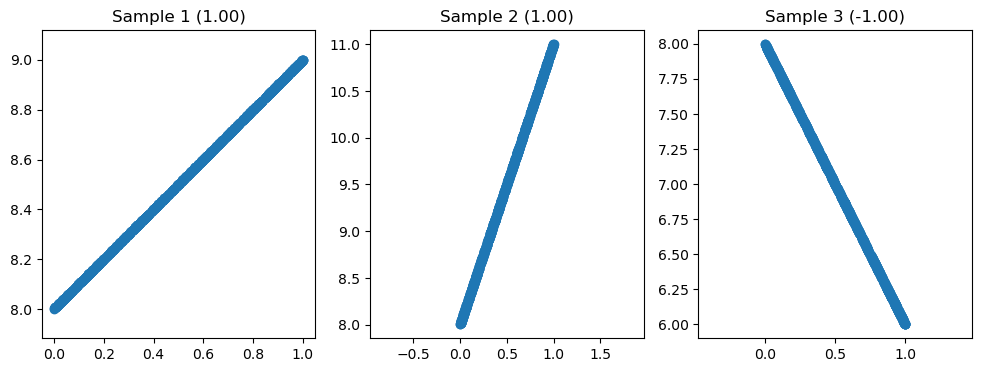

In [28]:
sample1 =  pd.DataFrame({'x':x,'y':x+8})
sample2 =  pd.DataFrame({'x':x,'y':3*x+8})
sample3 =  pd.DataFrame({'x':x,'y':-2*x+8})

plt.figure(figsize=(12,4))
plt.subplot(131)
s=sample1
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Sample 1 (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(132)
s=sample2
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Sample 2 (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(133)
s=sample3
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Sample 3 (%0.2f)"%pearsonr(s['x'],s['y'])[0])
plt.show()

#### Pearson Correlation Coefficient and Discrete Variables
It's important to remember that the **Pearson correlation coefficient is designed to measure the linear relationship between two continuous variables**. It is not suitable for nominal categorical variables (e.g., "City" or "Favorite Color"), as the categories have no inherent numerical order.

However, a notable exception exists for the specific case where you have **one continuous variable and one dichotomous** variable (a discrete variable with only two categories, like "Yes/No" or "Survived/Died"). In this scenario, you can convert the two categories into the numbers `0` and `1`. By applying the standard Pearson formula to this data, you calculate what is known as the **point-biserial correlation coefficient ($r_{pb}$)**.

The example below shows how to compute the point-biserial correlation coefficient between `Sex` and `Age`:

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr, pearsonr

# Load the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

# Drop rows where 'Age' is missing to perform the correlation
titanic_cleaned = titanic.dropna(subset=['Age'])

# Extract the two variables of interest
age = titanic_cleaned['Age']
survived = titanic_cleaned['Sex'].replace({'male':'1','female':'0'}).astype(int)

# --- Method 1: Using the specific pointbiserialr function ---
pbr_result = pointbiserialr(age, survived)
print(f"Point-Biserial Correlation: {pbr_result.correlation:.4f}")

# --- Method 2: Verifying with the standard Pearson correlation function ---
# The result should be identical
pearson_result = pearsonr(age, survived)
print(f"Pearson Correlation (on the same data): {pearson_result[0]:.4f}")

Point-Biserial Correlation: 0.0933
Pearson Correlation (on the same data): 0.0933


We see a small positive association: males tend to be older. This is also confirmed by the boxplot below:

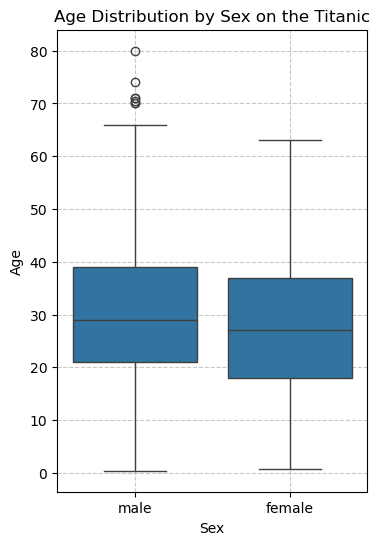

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Set up the plot
plt.figure(figsize=(4, 6))

# Create boxplots to compare the age distribution by sex
sns.boxplot(data=titanic_cleaned, x='Sex', y='Age')

# Add titles and labels for clarity
plt.title('Age Distribution by Sex on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.grid(linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### Spearman's Rank Correlation Coefficient

Pearson's coefficient captures linear relationships between variables. However, there are cases where the relationship between two variables may not be linear, but it still makes sense to try and understand if a correlation exists.

Imagine we have a series of users who assign scores to products they review. Each user will use a different and probably non-linear subjective scale. Pearson's correlation coefficient would not be the most appropriate to check if the scores assigned by two users are correlated.

**Spearman's correlation coefficient tries to solve this problem by moving from scores to ranks**. Instead of reasoning about individual scores, Spearman's correlation coefficient orders the products by score and checks if the resulting orderings are similar.

Consider the sample $\{(x^{(i)},y^{(i)})\}_i$. Let $R(x^{(i)})$ and $R(y^{(i)})$ be the ranks associated with the values of the two variables, and let $d_i=R(x^{(i)})$ - $R(y^{(i)})$. Spearman's rank correlation coefficient is defined as follows:

$$ R = 1 - \frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)} $$

The values of Spearman's coefficient are normalized between $-1$ and $+1$ and have a similar interpretation to Pearson's coefficient.

Consider the following example. We ask Alice, Bob, Charlie, and David to assign a score from $1$ to $5$ to four ice cream flavors, obtaining these results:

In [29]:
import pandas as pd
from scipy.stats import spearmanr

# Create a DataFrame with ice cream flavor scores
data = {
    'Participant': ['Alice', 'Bob', 'Charlie', 'David'],
    'Chocolate': [5, 3, 4, 2],   # Scores out of 5
    'Vanilla': [4, 5, 3, 3],      # Scores out of 5
    'Strawberry': [3, 4, 5, 2],   # Scores out of 5
    'MintChip': [2, 2, 2, 5]      # Scores out of 5
}

df = pd.DataFrame(data)
df

,Participant,Chocolate,Vanilla,Strawberry,MintChip
0,Alice,5,4,3,2
1,Bob,3,5,4,2
2,Charlie,4,3,5,2
3,David,2,3,2,5


Given that each child can use a different scale, we use Spearman's coefficient, obtaining the following values:

In [30]:
# Calculate the Spearman correlation coefficients
spearman_corr_chocolate_vs_vanilla, _ = spearmanr(df['Chocolate'], df['Vanilla'])
spearman_corr_chocolate_vs_strawberry, _ = spearmanr(df['Chocolate'], df['Strawberry'])
spearman_corr_chocolate_vs_mintchip, _ = spearmanr(df['Chocolate'], df['MintChip'])

# Calculate and display the Spearman correlation coefficients
print(f"Spearman Correlation (Chocolate vs. Vanilla): {spearman_corr_chocolate_vs_vanilla:.2f}")
print(f"Spearman Correlation (Chocolate vs. Strawberry): {spearman_corr_chocolate_vs_strawberry:.2f}")
print(f"Spearman Correlation (Chocolate vs. MintChip): {spearman_corr_chocolate_vs_mintchip:.2f}")

Spearman Correlation (Chocolate vs. Vanilla): 0.21
Spearman Correlation (Chocolate vs. Strawberry): 0.40
Spearman Correlation (Chocolate vs. MintChip): -0.77


Spearman correlation values are computed using the `spearmanr` function.

These values tell us that the ice cream flavor that received scores "most similar" to chocolate is strawberry.

Unlike the Pearson coefficient, Spearman's index can capture non-linear relationships, as shown in the following example:

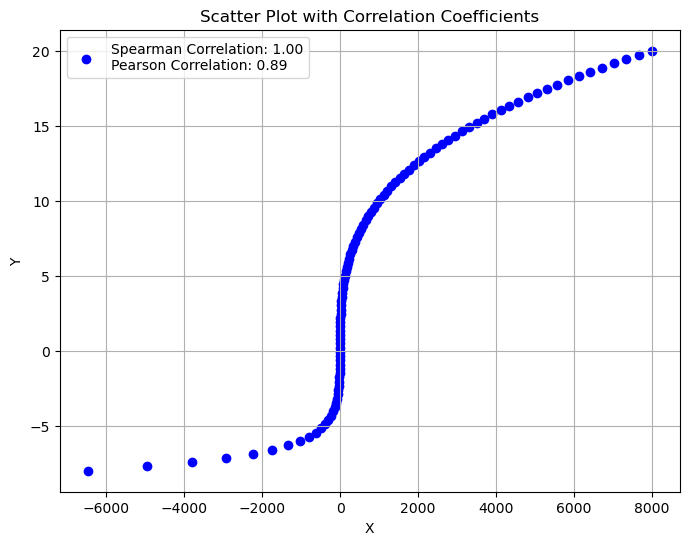

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Generate non-linear data
np.random.seed(42)
x = np.linspace(-8, 20, 100)
#y = x**2 + np.random.randn(50)  # A non-linear relationship with some noise
y = x**3-2*(1+np.exp(-x)) + 0.01*np.random.randn(100) 

y, x = x, y

# Calculate the Spearman and Pearson correlation coefficients
spearman_corr, _ = spearmanr(x, y)
pearson_corr, _ = pearsonr(x, y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Spearman Correlation: {spearman_corr:.2f}\nPearson Correlation: {pearson_corr:.2f}', color='blue')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Correlation Coefficients')

# Show legend
plt.legend()

# Display the plot
plt.grid()
plt.show()

### Kendall's Correlation Coefficient

Kendall's rank correlation coefficient, also known as **Kendall's $\tau$**, is also used to measure the level of association between two variables, considering their ranks.

Let's consider the sample $\{(x^{(i)},y^{(i)})\}_i$. Each pair of observations $(x_i,y_i)$ and $(x_j,y_j)$, with $i<j$ is called:
* **concordant** if: $x_i>x_j$ and $y_i>y_j$ or $x_i<x_j$ and $y_i<y_j$;
* **discordant** if: $x_i<x_j$ and $y_i>y_j$ or $x_i>x_j$ and $y_i<y_j$;

Kendall's $\tau$ coefficient is defined as follows:

$$\tau = \frac{\text{concordant pairs} - \text{discordant pairs}}{\text{pairs}}$$

The following graph shows a sample with six points. Each line shows a possible pair of points. The green lines show the concordant pairs, while the red ones show the discordant pairs. Kendall's coefficient for this example is given by:

$$\tau = \frac{4-2}{6} = \frac{1}{3}$$

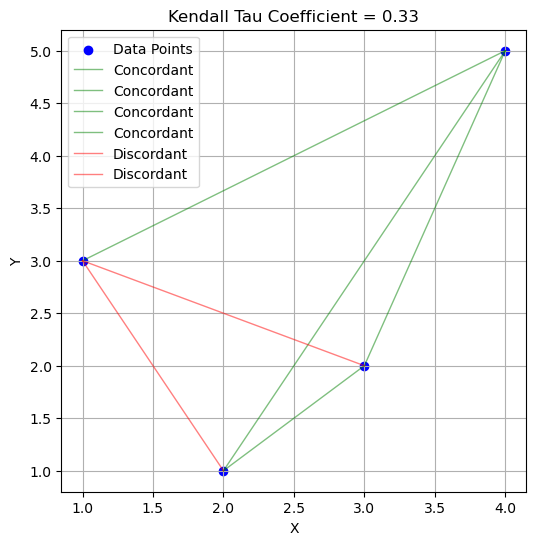

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Sample data
x = [1, 2, 3, 4]
y = [3, 1, 2, 5]

# Calculate Kendall tau coefficient
tau, _ = kendalltau(x, y)

# Create lists to store concordant and discordant pairs
concordant_pairs_x = []
concordant_pairs_y = []
discordant_pairs_x = []
discordant_pairs_y = []

# Determine concordant and discordant pairs
for i in range(len(x)):
    for j in range(i+1, len(y)):
        if (x[i] - x[j]) * (y[i] - y[j]) > 0:
            concordant_pairs_x.append([x[i], x[j]])
            concordant_pairs_y.append([y[i], y[j]])
        else:
            discordant_pairs_x.append([x[i], x[j]])
            discordant_pairs_y.append([y[i], y[j]])

# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c='b', marker='o', label='Data Points')

# Plot concordant pairs in green
for i in range(len(concordant_pairs_x)):
    plt.plot(concordant_pairs_x[i], concordant_pairs_y[i], c='g', linestyle='-', linewidth=1, alpha=0.5, label='Concordant')

# Plot discordant pairs in red
for i in range(len(discordant_pairs_x)):
    plt.plot(discordant_pairs_x[i], discordant_pairs_y[i], c='r', linestyle='-', linewidth=1, alpha=0.5, label='Discordant')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Kendall Tau Coefficient = {tau:.2f}')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

The kendall correlation coefficients for our earlier examples can be computed as follows:

In [33]:
from scipy.stats import kendalltau

# Calculate the Kendall correlation coefficients
kendall_corr_chocolate_vs_vanilla, _ = kendalltau(df['Chocolate'], df['Vanilla'])
kendall_corr_chocolate_vs_strawberry, _ = kendalltau(df['Chocolate'], df['Strawberry'])
kendall_corr_chocolate_vs_mintchip, _ = kendalltau(df['Chocolate'], df['MintChip'])

# Display the Kendall correlation coefficients
print(f"Kendall Correlation (Chocolate vs. Vanilla): {kendall_corr_chocolate_vs_vanilla:.2f}")
print(f"Kendall Correlation (Chocolate vs. Strawberry): {kendall_corr_chocolate_vs_strawberry:.2f}")
print(f"Kendall Correlation (Chocolate vs. MintChip): {kendall_corr_chocolate_vs_mintchip:.2f}")

Kendall Correlation (Chocolate vs. Vanilla): 0.18
Kendall Correlation (Chocolate vs. Strawberry): 0.33
Kendall Correlation (Chocolate vs. MintChip): -0.71


### Correlation Matrix

Similarly to what was seen in the case of scatterplots, when we have multiple variables, we can calculate the correlation indices between all variables in the dataset. In this way, we obtain a "correlation matrix". 
We can compute a correlation matrix with the `corr` function. The correlation matrix calculated using Pearson's coefficient, in the case of our `diabetes` dataset, will be:

In [35]:
from statsmodels.datasets import get_rdataset
data = get_rdataset('Diabetes','heplots').data
data.drop('group',axis=1).corr()

,relwt,glufast,glutest,instest,sspg
relwt,1.000000,-0.008813,0.023984,0.222238,0.384320
glufast,-0.008813,1.000000,0.964628,-0.396235,0.715480
glutest,0.023984,0.964628,1.000000,-0.337020,0.770942
instest,0.222238,-0.396235,-0.337020,1.000000,0.007914
sspg,0.384320,0.715480,0.770942,0.007914,1.000000


We can specify spearman or kendall coefficient as follows:

In [36]:
data.drop('group',axis=1).corr(method='spearman')

,relwt,glufast,glutest,instest,sspg
relwt,1.000000,0.204332,0.244952,0.231419,0.421998
glufast,0.204332,1.000000,0.767299,-0.265128,0.615134
glutest,0.244952,0.767299,1.000000,-0.164513,0.747564
instest,0.231419,-0.265128,-0.164513,1.000000,0.019898
sspg,0.421998,0.615134,0.747564,0.019898,1.000000


In [37]:
data.drop('group',axis=1).corr(method='kendall')

,relwt,glufast,glutest,instest,sspg
relwt,1.000000,0.137786,0.162601,0.158357,0.295005
glufast,0.137786,1.000000,0.608882,-0.175293,0.452355
glutest,0.162601,0.608882,1.000000,-0.091613,0.552304
instest,0.158357,-0.175293,-0.091613,1.000000,0.051423
sspg,0.295005,0.452355,0.552304,0.051423,1.000000


There is also a graphical representation of the correlation matrix, often called "correlation plot":

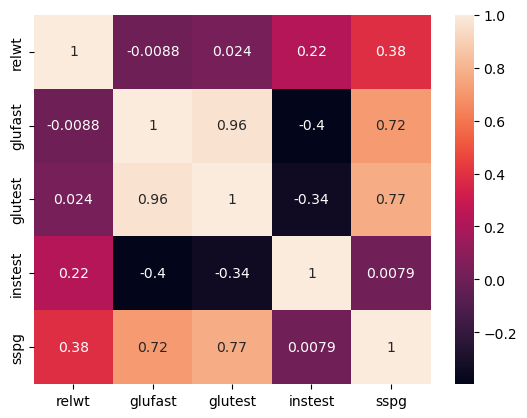

In [39]:
sns.heatmap(data.drop('group',axis=1).corr(), annot=True)
plt.show()

## Additional Measures of Correlation Between Discrete Variables (Optional)
This section reports optional material on two measures of correlation between discrete variables which are often used in epidemiology and biostatistics.

### Relative Risk

Relative risk is one of the most common methods for measuring the degree of correlation between two discrete variables in epidemiology.

Let's look at an example (from [here](https://en.wikipedia.org/wiki/Odds_ratio)): suppose that in a village of $1000$ people, the incidence of a rare disease has increased. Investigating, we discover that recently a part of the population has been exposed to radiation.

The data relating to diseased and healthy subjects exposed or not exposed to the risk (the radiation) is summarized by the following contingency table that relates the "Diseased/Healthy" variable to the "Exposed/Non Exposed" one:

In [ ]:
contingency = pd.DataFrame({
    "Exposed": [20, 380],
    "Non Exposed": [6,594]
}, index=["Diseased", "Healthy"])
contingency

,Exposed,Non Exposed
Diseased,20,6
Healthy,380,594


The table indicates the number of people who have contracted a given disease or not, in relation to whether they have been exposed to a certain risk or not (e.g., to a pollutant).

The risk of developing the disease if exposed can be calculated with the following probability:

$$P(Diseased|Exposed) = \frac{\#\ (Diseased, Exposed)}{\#\ Exposed} = \frac{20}{20+380} = 0.05$$

We see that we have a $5\%$ risk of developing the disease if exposed to radiation. For example, among $100$ people exposed to the risk, we expect to find $5$ sick.

The risk calculated above, by itself, does not tell us much about the association between the variables "Exposed" and "Non Exposed". Let's now consider the probability of contracting the disease if not exposed to the risk:

$$P(Diseased|Non\ Exposed) = \frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed} = \frac{6}{6+594} = 0.01$$

This value tells us that we have a risk of about $1\%$ of contracting the disease if not exposed. In practice, out of $100$ subjects not exposed to the risk, $1$ gets sick.

It is useful to compare these two risk values. Indeed, although the $5\%$ risk of getting sick among exposed subjects is not a very high number in absolute terms, it must also be said that the proportion of sick subjects not exposed to the risk is much lower ($1\%$). We therefore define relative risk as the ratio between these two risks (or probabilities):

$$\textit{RR} = \frac{P(Diseased|Exposed)}{P(Diseased|Non\ Exposed)} = \frac{\frac{\#\ (Diseased, Exposed)}{\#\ Exposed}}{\frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed}} = \frac{0.05}{0.01}=5$$

We interpret this value as follows:

> The proportion of subjects who contract the disease is $5$ times greater among those who have been exposed to the risk, compared to the group of those who have not.

For example, if among $100$ people not exposed to the risk, generally $10$ get sick (a risk of $10\%$), then we expect that among $100$ people exposed to the risk, as many as $50\%$ will get sick!

Relative risk tells us nothing about the absolute risk (the proportion of people who get sick), but only about how observing subjects exposed to the risk, compared to observing subjects not exposed to the risk, can influence the proportion of sick subjects.

Generally:
* $RR=1$ indicates that exposure to the risk is irrelevant in the development of the disease (the variables are independent);
* $RR>1$ indicates that exposure to the risk is positively associated with the development of the disease (there are more sick people among subjects exposed to the risk);
* $RR<1$ indicates that exposure to the risk is negatively associated with the development of the disease (there are fewer sick people among subjects exposed to the risk). In this case, it is said that the risk "protects" against the onset of the disease (useful if the "risk" is actually taking a drug).

**Note that relative risk measures a correlation between variables, not a cause-and-effect relationship, so it is not always correct to say that in the presence of a relative risk greater than 1, exposure to the risk "causes" the disease. However, there are tools (causal analysis) that allow us to verify in which cases we can give this interpretation. These tools are fundamental for ascertaining whether a particular drug causes (or is co-responsible for) a recovery or whether a particular habit (e.g., smoking) causes (or is co-responsible for) the onset of a disease. We will see more examples later in the course.**

### Odds Ratio

Relative risk cannot always be calculated. In fact, in the previous case, we assumed we had access to all population data: for all $1000$ inhabitants, we knew who had been exposed to the risk and who had not, and who had developed the disease and who had not. In many cases, we might not have all this data. For example, imagine that the incident occurred $50$ years ago and that at the time only a random sample of $50\%$ of the $1000$ inhabitants of the village was interviewed. Suppose we obtain the following contingency table:

In [ ]:
contingency2 = pd.DataFrame({
    "Exposed": [20, 10],
    "Non Exposed": [6,16]
}, index=["Diseased", "Healthy"])
contingency2

,Exposed,Non Exposed
Diseased,20,6
Healthy,10,16


Note that this case (that of sampling) will be the most frequent, as we often do not have access to the entire population, but only to a sample.

In this case, we cannot calculate the relative risk as the real numbers of people exposed and not exposed to risk, which were in the denominator of the risk calculation expressions, are not available. If we still apply the formula, we will get an estimate biased by our sampling:

$$\textit{RR} = \frac{P(Diseased|Exposed)}{P(Diseased|Non\ Exposed)} = \frac{\frac{\#\ (Diseased, Exposed)}{\#\ Exposed}}{\frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed}} = \frac{20/(20+10)}{6/(6+16)}=2.45$$

Although we cannot calculate the relative risk as we do not know the absolute number of sick and exposed people, **we expect our sample to be a good representation of the population**, therefore we can reason in terms of "odds".

Odds are a probability concept widely used in betting, because they allow the bettor to easily calculate the payout to collect. For example, if team $A$'s victory over team $B$ in a soccer match is given as $5:1$, the bookmaker expects team $A$ to be $5$ times more likely to win than team $B$. If I bet $2$ euros on team $B$ and team $B$ wins, then I will win $5\times 2 = 10$ euros (I bet on a rare event). The odd in this case would be defined as:

$$odd = \frac{5}{1} = 5$$

Alternatively, I can reason in terms of probability. Given the scheme above, I expect that, if we played the match $100$ times, then the probability of victories for team $A$ would be equal to $P(A\ wins)=\frac{5}{5+1}$, while the probability of loss would be equal to $P(A\ loses)=\frac{1}{5+1}$. The odd can be defined in terms of these probabilities:

$$odd = \frac{P(A\ wins)}{P(A\ loses)} = \frac{\frac{5}{5+1}}{\frac{1}{5+1}} = 5$$

In general, the odd for an event $E$ is the probability that the event occurs, divided by the probability that the event does not occur:

$$odd = \frac{P(E)}{1-P(E)}$$

The odd is a concept similar to risk because it tells us how much greater the frequency of an event occurring (A wins) is compared to the frequency of the event not occurring. Let's apply this concept to our example. We define two odds (just as we defined two risks):

* The odds of getting sick if exposed: $\frac{P(Diseased|Exposed)}{P(Healthy|Exposed)} = \frac{\frac{20}{20+10}}{\frac{10}{20+10}} = \frac{20}{10} = 2$
* The odds of getting sick if not exposed: $\frac{P(Diseased|Non\ Exposed)}{P(Healthy|Non\ Exposed)} = \frac{\frac{6}{6+16}}{\frac{16}{6+16}} = \frac{6}{16} = 0.375$

It should be noted that in the formulas above, the absolute counts, i.e., those we do not trust given the sampling, "cancel out".

The odds ratio will be defined as follows:

$$odd = \frac{\frac{P(Diseased|Exposed)}{P(Healthy|Exposed)}}{\frac{P(Diseased|Non\ Exposed)}{P(Healthy|Non\ Exposed)}} = \frac{2}{0.375} \approx 5.3$$

We note that the obtained odds ratio is very close to the previously calculated relative risk of $5$. **In practice, it can be demonstrated that, if it is assumed that the disease is rare (rare-disease assumption), the odds ratio and the relative risk converge to similar values.** It is therefore a fairly common practice to make this assumption and calculate the odds ratio instead of the relative risk.

#### Relative Risk and Odds Ratio in Python

Let's consider this contingency table:

In [ ]:
import pandas as pd
contingency = pd.DataFrame({
    "Exposed": [20, 380],
    "Non Exposed": [6,594]
}, index=["Diseased", "Healthy"])
contingency

,Exposed,Non Exposed
Diseased,20,6
Healthy,380,594


We can calculate the relative risk as follows:

In [ ]:
from scipy.stats.contingency import relative_risk
relative_risk(contingency['Exposed']['Diseased'],contingency['Exposed'].sum(),contingency['Non Exposed']['Diseased'], contingency['Non Exposed'].sum())

RelativeRiskResult(relative_risk=5.0, exposed_cases=20, exposed_total=400, control_cases=6, control_total=600)

The function requires that the various necessary values be passed rather than the contingency matrix to avoid ambiguity.

The odds ratio is calculated as follows:

In [ ]:
from scipy.stats.contingency import odds_ratio
odds_ratio(contingency)

OddsRatioResult(statistic=5.202179487843029)

## Exercises

> Exercise 1
> 
> Considering the Titanic dataset, calculate for each variable the count, mean, standard deviation, minimum, maximum, median value, first and third quartile. After calculating the requested values individually, use the `describe` method to obtain these values. Which variable is the most dispersed?

> Exercise 2
> 
> Considering the Titanic dataset, for each of the three classes, calculate the means and variances of passenger ages. In which class are the ages least dispersed? Which class contains the youngest individuals? Complete the analysis with bar charts.

> Exercise 3
> 
> Add a new column "Old" to the Titanic dataset, which takes a value of 1 for observations with an age greater than the average value and 0 otherwise. Then, calculate a crosstab that computes the number of "elderly" subjects (subjects for whom old is equal to 1) with respect to the Pclass and Sex variables. Display a barplot based on the table. In which class do men tend to be much older than women?

> Exercise 4
> 
> Load the mpg dataset using the seaborn library (use the instruction `t=sns.load_dataset('mpg')`). Visualize the scatter matrix by differentiating the colors of the points according to the values of the `origin` variable. Who produces the heaviest cars? Are there pairs of variables that are a decisive factor in distinguishing one origin from the others?

> Exercise 5
> 
> Considering the `mpg` dataset, choose a group of variables for which to obtain a parallel coordinates plot. What can we infer from the plot?

## References
* Chapter 3 of: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.
* https://en.wikipedia.org/wiki/Odds_ratio